In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Clustering is a type of unsupervised learning that allows us to find groups of similar objects, objects that are more related to each other than to the objects in other groups.

Unsupervised because labels are missing - we dont know what to make of data

Examples of business use cases include the grouping of documents, music, and movies based on their contents, or finding customer segments based on purchase behavior as a basis for recommendation engines.

The goal of clustering is to separate the data into groups, or clusters, with more similar traits to each other than to the data in the other clusters

Different Types of Clustering Algorithms - Major ones: 

Centroid based models - each cluster is represented by a single mean vector (e.g., k-means),
Connectivity based models - built based on distance connectivity (e.g., hierarchical clustering)
Distribution based models - built using statistical distributions (e.g., Gaussian mixtures)
Density based models - clusters are defined as dense areas (e.g., DBSCAN)


K means Clustering 

Assuming that there are n data points, the algorithm works as follows:

Step 1: initialization - pick k random points as cluster centers, called centroids

Step 2: cluster assignment - assign each data point to its nearest centroid based on its distance to each centroid, and that forms k clusters

Step 3: centroid updating - for each new cluster, calculate its centroid by taking the average of all the points assigned to the cluster

Step 4: repeat steps 2 and 3 until none of cluster assignments change, or it reaches the maximum number of iterations

However, it is difficult to predict the number of clusters, it can get stuck in local optimums, and it can perform poorly when the clusters are of varying sizes and density.

How do we calculate the distance in k-means algorithm?

Through euclidean distance - pythagoras theorem 
There are other distance metrics, such as Manhattan distance, cosine distance, etc. The choice of the distance metric depends on the data.

Wine Data is going be used here in this tutorial

result of a chemical analysis of wines grown in a particular region in Italy.
goal is to try to group similar observations together and determine the number of possible clusters.

The analysis reported the quantities of 13 constituents from 178 wines: 
1. alcohol, 2. malic acid, 3. ash, 4. alcalinity of ash, 5. magnesium, 6. total phenols, 7. flavanoids, 8. nonflavanoid phenols, 9. proanthocyanins, 10. color intensity, 11. hue, 12. od280/od315 of diluted wines, and 13. proline.


In [2]:
# Loading the data and evaluating it

import numpy as numpy 
import pandas as pd
from sklearn.datasets import load_wine

data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)
print(wine.shape)
print(wine.columns)

# Basic statics of first 3 features
print(wine.iloc[:,:3].describe())

(178, 13)
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
          alcohol  malic_acid         ash
count  178.000000  178.000000  178.000000
mean    13.000618    2.336348    2.366517
std      0.811827    1.117146    0.274344
min     11.030000    0.740000    1.360000
25%     12.362500    1.602500    2.210000
50%     13.050000    1.865000    2.360000
75%     13.677500    3.082500    2.557500
max     14.830000    5.800000    3.230000


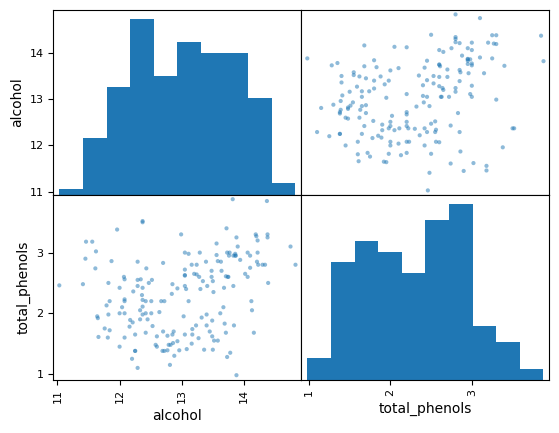

In [3]:
# Plotting the data 

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(wine.iloc[:,[0,5]])
plt.savefig("plot.png")
plt.show()

As we don’t know the ground truth, we look into the scatter plots to come up with a reasonable candidate for k, the number of clusters. 

There seem to be roughly three subgroups. 

Remember that there are no right or wrong answers for the number of subgroups. 

In the real world data, rarely do we find clear clusters; but we come up with our best educated guess. 
For example, in the scatter plot above, there seem to be three subgroups.

Pre-processing: Standardization

After examining all the pairs of scatter plot, we pick two features to better illustrate the algorithm: alcohol and total_phenols, whose scatterplot also suggests three subclusters.

Unlike any supervised learning models, in general, **unsupervised machine learning models do not require to split data into training and testing sets** since there is no ground truth to validate the model.

However, **centroid-based algorithms require one pre-processing step because k-means works better on data where each attribute is of similar scales.**

One way to achieve this is to standardize the data; mathematically:
z = (x - mean) / std

StandardScaler under the sklearn.preprocessing makes it easy:

In [4]:
X = wine[['alcohol', 'total_phenols']] 

from sklearn.preprocessing import StandardScaler
# instantiate the scaler
scale = StandardScaler()
# compute the mean and std to be used later for scaling
scale.fit(X)

# This are raw values 
print(scale.mean_)
print(scale.scale_)

print("\n")

# Now we Transform/Scale the data around 0,0
X_scaled = scale.transform(X)
# Let’s do a sanity check to see if each feature is centered at 0 and has a std of 1:
print(X_scaled.mean(axis=0))  # Mean comes down almost to zero, as data is scaled around 0,0
print(X_scaled.std(axis=0))

[13.00061798  2.29511236]
[0.80954291 0.62409056]


[ 7.84141790e-15 -1.95536471e-16]
[1. 1.]


Modelling

K-means Modeling

we follow instantiate / fit / predict workflow



In [5]:
from sklearn.cluster import KMeans
# instantiate the model
kmeans = KMeans(n_clusters=3)
# fit the model
kmeans.fit(X_scaled)
# make predictions
y_pred = kmeans.predict(X_scaled)
print(y_pred)

print("\n")
print(kmeans.cluster_centers_) # See the cluster centres



/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 2 2 1 2 1 2 0 1 0 1
 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 0 0 0 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


[[ 0.05253603 -1.14020926]
 [ 0.92017418  0.87087204]
 [-1.06183503  0.08414606]]


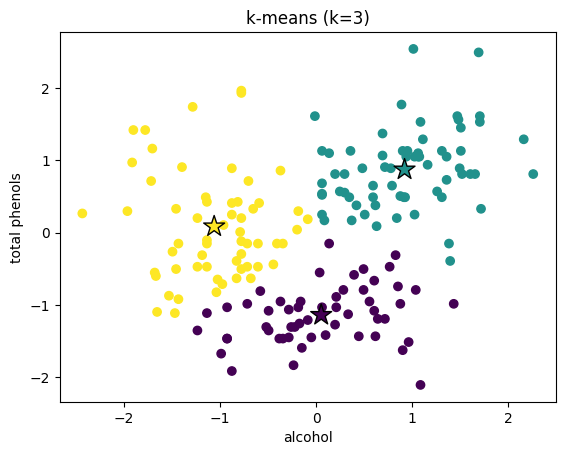

In [6]:
""" Data Visualization """
# plot the scaled data
plt.scatter(X_scaled[:,0],
            X_scaled[:,1],
            c= y_pred)
# identify the centroids
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker="*",
            s = 250,
            c = [0,1,2],
            edgecolors='k')

plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.title('k-means (k=3)')
plt.savefig("plot.png")
plt.show()

 K-means divides wines into three groups: 
1. low alcohol but high total phenols (upper right in green), 
2. high alcohol and high total phenols (upper left in yellow), and 
3. low total phenols (bottom in purple)

For any new wine with the chemical report on alcohol and total phenols, we now can classify it based on its distance to each of the centroids. 

Suppose that there is new wine with alcohol at 13 and total phenols at 2.5, let’s predict which cluster the model will assign the new wine to.

In [7]:

X_new = np.array([[13, 2.5]])
X_new_scaled = scale.transform(X_new)

print(kmeans.predict(X_new_scaled))

print(kmeans.cluster_centers_[kmeans.predict(X_new_scaled)])

[1]
[[0.92017418 0.87087204]]


/usr/local/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


One major shortcoming of k-means is that the random initial guess for the centroids can result in bad clustering, and k-means++ algorithm addresses this obstacle by specifying a procedure to initialize the centroids before proceeding with the standard k-means algorithm. In scikit-learn, the initialization mechanism is set to k-means++, by default.

Optimal K: The Elbow method

As shown, k-means will be happy to divide the dataset into any integer number of clusters, ranging from 1, an extreme case where all data points belong to one big cluster, to n, another extreme case where each data point is its own cluster.

So which one should we choose, 2, or 3, or 4 for the wines?

Intuitively, k-means problem partitions n data points into k tight sets such that the data points are closer to each other than to the data points in the other clusters. 

the tightness can be measured as the sum of squares of the distance from data point to its nearest centroid, or inertia.

n scikit-learn, it is stored as inertia_, e.g. when k = 2, the distortion is 185:

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

185.25081541190127
114.34674038310786


/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

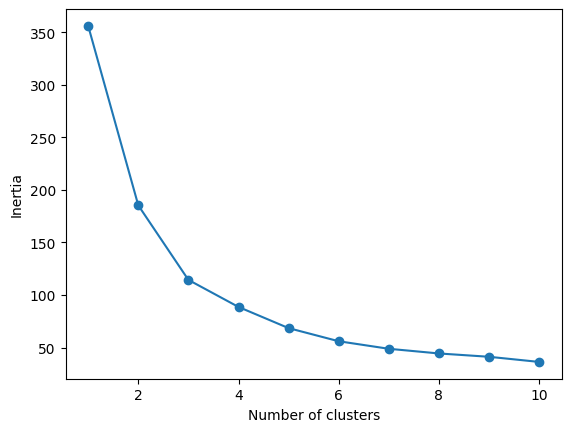

In [8]:
# Inertia when k=2
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

# inertia when k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

# We plot the inertia for different values of k:
inertia = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# plot
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

As the plot shows, the inertia decreases as the number of clusters increases. The optimal k should be where the inertia no longer decreases as rapidly.

For example, k=3 seems to be optimal,

as we increase the number of clusters from 3 to 4, the decrease in inertia slows down significantly, compared to that from 2 to 3. 

This approach is called elbow method (can you see why? - elbow at 3). It is a useful graphical tool to estimate the optimal k in k-means.

Modelling with More Features

Previously to build kmeans models, we used two (out of thirteen) features: alcohol and total phenols.

The choice is random and it is easy to visualize the results.

However, can we use more features, for example all of them? Why not? Let’s try it.

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

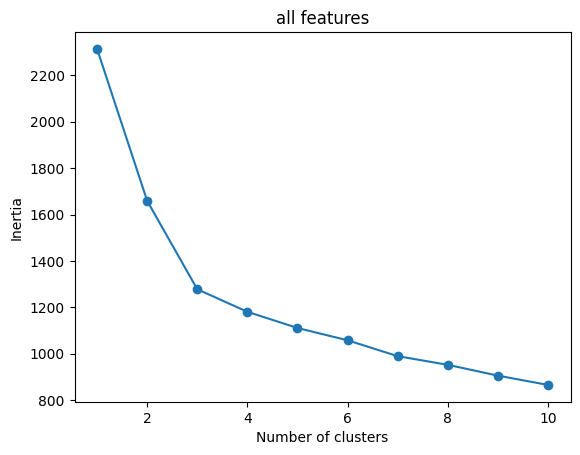

In [9]:
X = wine # Using all the features of dataset

scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)


from sklearn.cluster import KMeans
# calculate distortion for a range of number of cluster
inertia = []
for i in np.arange(1, 11):
    km = KMeans(
        n_clusters=i 
        )
    km.fit(X_scaled) 
    inertia.append(km.inertia_)
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("all features")
plt.savefig("plot.png")
plt.show()

Similarly we spot that the inertia no longer decreases as rapidly after k = 3. We then finalize the model by setting n_clusters = 3 and obtain the predictions.

In [10]:
k_opt = 3
kmeans = KMeans(k_opt)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Compared to the predictions using only two features, the two models produce very similar results.

For instance, the first 21 wines are predicted to belong to the same cluster from both models, so are the last 19 wines.

In fact, only 13 out of 178 wines were clustered differently by the two models.

which model is better? Recall that clustering is an unsupervised learning method, which indicates that we don’t know the ground truth of the labels. Thus it is difficult, if not impossible, to determine that the model with 2 features is more accurate in grouping wines than the one with all 13 features, or vice versa.

Which model, in other words which features, should you choose is often determined by external information.


In practice, the features are often chosen by the collaboration between data scientists and domain knowledge experts.